In [1]:
from pathlib import Path
import pandas as pd

In [2]:
filepath = "/home/viktor/Documents/kaggle/kaggle_llm/data/data_dumps/more_questions/more_questions_raw_questions_wiki_sci_1.csv"
file_name = filepath.split("/")[-1].split(".")[0]
print(file_name)
csv = pd.read_csv(filepath, index_col=0)
csv.head()

more_questions_raw_questions_wiki_sci_1


,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,What is the significance of HD 7924 b?,It is the first planet discovered in the const...,It is a super-Earth exoplanet with a minimum m...,It takes only about 129.5 hours to orbit the star,It is located approximately 55 light years away,It is a gaseous planet with unknown mass,B,0,0
1,2,What is the significance of HD 69830 b?,It is a gas giant exoplanet.,It takes 82/3 days to complete an orbit.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,B,0,1
2,3,What is the difference between HD 69830 b and ...,HD 69830 b takes 82/3 days to complete an orbi...,HD 69830 b is 10 times more massive than Earth...,HD 69830 b orbits very close to its parent sta...,"HD 69830 b is a rocky planet, while a gas gian...",HD 69830 b models predict that tidal heating w...,D,0,1
3,4,What is the reason for HD 69830 b not being a ...,It takes 82/3 days to complete an orbit.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It is a rocky planet.,It orbits very close to its parent star.,D,0,1
4,5,What is the role of tidal heating in HD 69830 b?,Tidal heating causes the high heat flux at the...,Tidal heating contributes to the 82/3 day orbi...,Tidal heating determines the rocky composition...,Tidal heating is responsible for the 10 times ...,Tidal heating allows HD 69830 b to orbit very ...,A,0,1


In [3]:
len(csv)

5227

In [4]:
filepath_2 = "/home/viktor/Documents/kaggle/kaggle_llm/data/kaggle-datasets/15k-high-quality-examples/15k_gpt3.5-turbo.csv"
csv_2 = pd.read_csv(filepath_2)
csv_2.head()

,prompt,A,B,C,D,E,answer
0,Who was responsible for the reorganisation of ...,Territorial brigades,First line divisions,Training Reserve,Second line divisions,British home army,C
1,What film earned Rakshit Shetty the Karnataka ...,Rakshit Shetty did not win the Karnataka State...,Nam Areal Ondina,Ulidavaru Kandanthe,The information is not provided in the Wikiped...,Simple Agi Ondh Love Story,C
2,What is the population of Maklavan?,"Maklavan has a population of 5,000 individuals...","Maklavan has a population of 1,500 individuals...","Maklavan has a population of 2,800 individuals...","Maklavan has a population of 3,800 individuals...","Maklavan has a population of 2,170 individuals...",E
3,What was the stud fee for Empire Maker at Gain...,"$90,000","$120,000","$85,000","$100,000","$75,000",D
4,What books has Brian J. Bowe published for Ens...,"Books about The Ramones, The Clash, and Judas ...","Books about The Ramones, The MC5, and Was (Not...","Books about The Ramones, The Clash, and The MC5.","Books about The Clash, The Stooges, and Judas ...","Books about The Stooges, The MC5, and Was (Not...",A


In [5]:
len(csv_2)

15000

In [6]:
# csv = pd.concat([csv, csv_2]).sample(frac=1).reset_index(drop=True)
# csv['id'] = csv.index
# csv

In [7]:
# replace NaN with "None"
csv = csv.fillna("None")

In [8]:
# "Which rows have 'What are the vascular bundles found in' in column 'prompt'?
csv[csv["prompt"].str.contains("What are the vascular bundles found in")]


,id,prompt,A,B,C,D,E,answer,cluster number,round
1128,1129,What are the vascular bundles found in the pet...,Single,Double,Multiple,Triple,None,A,294,1


In [9]:
len(csv)

5227

['B' 'D' 'A' 'C' 'E' 'A5III']


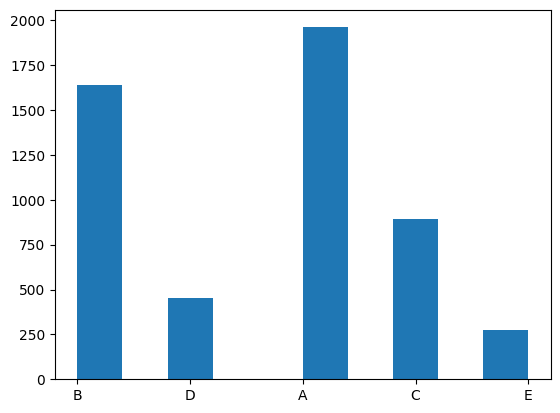

In [10]:
import matplotlib.pyplot as plt

print(csv['answer'].unique())

# remove A5III from answer
csv = csv[csv['answer'] != 'A5III']


plt.hist(csv['answer'].values);

In [11]:
import pandas as pd
import numpy as np

def shuffle_answers(df):
    # Shuffle answers
    answers = ['A', 'B', 'C', 'D', 'E']

    for idx, row in df.iterrows():
        current_answer = row['answer']
        
        # Choose a new answer that's different from the current answer
        new_answer = np.random.choice([ans for ans in answers if ans != current_answer])
        
        # Swap the text from the current answer to the new answer and vice-versa
        df.at[idx, current_answer], df.at[idx, new_answer] = df.at[idx, new_answer], df.at[idx, current_answer]
        
        # Update the answer column with the new answer
        df.at[idx, 'answer'] = new_answer


    return df

In [12]:
# Sample DataFrame
data = {
    'id': [1, 2, 3, 4, 5],
    'prompt': ['q1', 'q2', 'q3', 'q4', 'q5'],
    'A': ['text1', 'text2', 'text3', 'text4', 'text5'],
    'B': ['text6', 'text7', 'text8', 'text9', 'text10'],
    'C': ['text11', 'text12', 'text13', 'text14', 'text15'],
    'D': ['text16', 'text17', 'text18', 'text19', 'text20'],
    'E': ['text21', 'text22', 'text23', 'text24', 'text25'],
    'answer': ['A', 'B', 'B', 'A', 'C'],
    'cluster number': [1, 2, 1, 3, 2],
    'round': [1, 1, 2, 2, 3]
}

df = pd.DataFrame(data)
df

,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,q1,text1,text6,text11,text16,text21,A,1,1
1,2,q2,text2,text7,text12,text17,text22,B,2,1
2,3,q3,text3,text8,text13,text18,text23,B,1,2
3,4,q4,text4,text9,text14,text19,text24,A,3,2
4,5,q5,text5,text10,text15,text20,text25,C,2,3


In [13]:

df = shuffle_answers(df)
df


,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,q1,text21,text6,text11,text16,text1,E,1,1
1,2,q2,text7,text2,text12,text17,text22,A,2,1
2,3,q3,text3,text13,text8,text18,text23,C,1,2
3,4,q4,text24,text9,text14,text19,text4,E,3,2
4,5,q5,text15,text10,text5,text20,text25,A,2,3


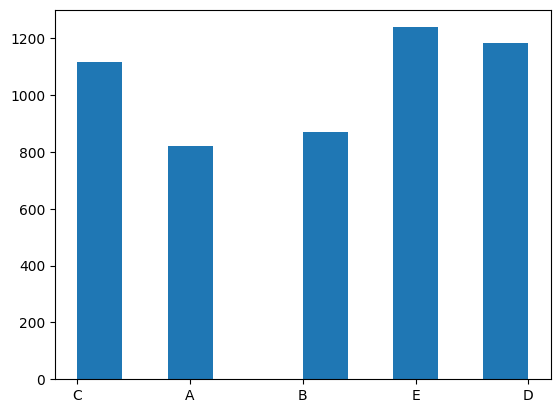

In [14]:
csv = shuffle_answers(csv)

plt.hist(csv['answer'].values);

In [15]:
csv

,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,What is the significance of HD 7924 b?,It is the first planet discovered in the const...,It takes only about 129.5 hours to orbit the star,It is a super-Earth exoplanet with a minimum m...,It is located approximately 55 light years away,It is a gaseous planet with unknown mass,C,0,0
1,2,What is the significance of HD 69830 b?,It takes 82/3 days to complete an orbit.,It is a gas giant exoplanet.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,A,0,1
2,3,What is the difference between HD 69830 b and ...,HD 69830 b takes 82/3 days to complete an orbi...,"HD 69830 b is a rocky planet, while a gas gian...",HD 69830 b orbits very close to its parent sta...,HD 69830 b is 10 times more massive than Earth...,HD 69830 b models predict that tidal heating w...,B,0,1
3,4,What is the reason for HD 69830 b not being a ...,It takes 82/3 days to complete an orbit.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,It is a rocky planet.,E,0,1
4,5,What is the role of tidal heating in HD 69830 b?,Tidal heating determines the rocky composition...,Tidal heating contributes to the 82/3 day orbi...,Tidal heating causes the high heat flux at the...,Tidal heating is responsible for the 10 times ...,Tidal heating allows HD 69830 b to orbit very ...,C,0,1
...,...,...,...,...,...,...,...,...,...,...
5222,5223,What is the significance of BL Herculis variab...,They have a longer period compared to other Ty...,They have a bump on the ascending side of thei...,They have the same luminosity as RR Lyrae vari...,They are population II stars found in the gala...,They are spectral class F at their brightest,D,999,0
5223,5224,What is the significance of X Crucis?,X Crucis is a Durchmusterung object.,X Crucis is a population I star.,X Crucis is a classical Cepheid variable.,X Crucis is a G-type supergiant.,X Crucis is a type of pulsating variable star.,E,999,1
5224,5225,What is the visual magnitude range of RW Cephei?,7.3 to 10.7,8.6 to 10.7,6.0 to 8.6,6.0 to 7.3,10.7 to 12.0,D,999,2
5225,5226,What is a variable star?,A star whose brightness remains constant over ...,A star that emits different colors of light.,A star whose brightness fluctuates as seen fro...,A star that exists in multiple places at once.,A star that only appears during certain seasons.,C,999,3


In [16]:
csv

,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,What is the significance of HD 7924 b?,It is the first planet discovered in the const...,It takes only about 129.5 hours to orbit the star,It is a super-Earth exoplanet with a minimum m...,It is located approximately 55 light years away,It is a gaseous planet with unknown mass,C,0,0
1,2,What is the significance of HD 69830 b?,It takes 82/3 days to complete an orbit.,It is a gas giant exoplanet.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,A,0,1
2,3,What is the difference between HD 69830 b and ...,HD 69830 b takes 82/3 days to complete an orbi...,"HD 69830 b is a rocky planet, while a gas gian...",HD 69830 b orbits very close to its parent sta...,HD 69830 b is 10 times more massive than Earth...,HD 69830 b models predict that tidal heating w...,B,0,1
3,4,What is the reason for HD 69830 b not being a ...,It takes 82/3 days to complete an orbit.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,It is a rocky planet.,E,0,1
4,5,What is the role of tidal heating in HD 69830 b?,Tidal heating determines the rocky composition...,Tidal heating contributes to the 82/3 day orbi...,Tidal heating causes the high heat flux at the...,Tidal heating is responsible for the 10 times ...,Tidal heating allows HD 69830 b to orbit very ...,C,0,1
...,...,...,...,...,...,...,...,...,...,...
5222,5223,What is the significance of BL Herculis variab...,They have a longer period compared to other Ty...,They have a bump on the ascending side of thei...,They have the same luminosity as RR Lyrae vari...,They are population II stars found in the gala...,They are spectral class F at their brightest,D,999,0
5223,5224,What is the significance of X Crucis?,X Crucis is a Durchmusterung object.,X Crucis is a population I star.,X Crucis is a classical Cepheid variable.,X Crucis is a G-type supergiant.,X Crucis is a type of pulsating variable star.,E,999,1
5224,5225,What is the visual magnitude range of RW Cephei?,7.3 to 10.7,8.6 to 10.7,6.0 to 8.6,6.0 to 7.3,10.7 to 12.0,D,999,2
5225,5226,What is a variable star?,A star whose brightness remains constant over ...,A star that emits different colors of light.,A star whose brightness fluctuates as seen fro...,A star that exists in multiple places at once.,A star that only appears during certain seasons.,C,999,3


# Experiment with embeddings

In [17]:
from sentence_transformers import SentenceTransformer

model_name = "BAAI/bge-large-en"

model = SentenceTransformer(model_name)

In [18]:
csv['prompt_joined'] = csv[['prompt', 'A', 'B', 'C', 'D', 'E']].apply(lambda x: x['prompt'] + " " + x['A'] + " " + x['B'] + " " + x['C'] + " " + x['D'] + " " + x['E'], axis=1)


In [19]:
csv['embd_prompt'] = csv['prompt_joined'].apply(lambda x: model.encode(x, normalize_embeddings=True))

In [20]:
csv.head()

,id,prompt,A,B,C,D,E,answer,cluster number,round,prompt_joined,embd_prompt
0,1,What is the significance of HD 7924 b?,It is the first planet discovered in the const...,It takes only about 129.5 hours to orbit the star,It is a super-Earth exoplanet with a minimum m...,It is located approximately 55 light years away,It is a gaseous planet with unknown mass,C,0,0,What is the significance of HD 7924 b? It is t...,"[0.0045667225, 0.0022730816, -0.01746294, 0.00..."
1,2,What is the significance of HD 69830 b?,It takes 82/3 days to complete an orbit.,It is a gas giant exoplanet.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,A,0,1,What is the significance of HD 69830 b? It tak...,"[0.010384566, 0.029635387, -0.02068469, 0.0027..."
2,3,What is the difference between HD 69830 b and ...,HD 69830 b takes 82/3 days to complete an orbi...,"HD 69830 b is a rocky planet, while a gas gian...",HD 69830 b orbits very close to its parent sta...,HD 69830 b is 10 times more massive than Earth...,HD 69830 b models predict that tidal heating w...,B,0,1,What is the difference between HD 69830 b and ...,"[0.019454451, 0.014072805, -0.0107564535, -0.0..."
3,4,What is the reason for HD 69830 b not being a ...,It takes 82/3 days to complete an orbit.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,It is a rocky planet.,E,0,1,What is the reason for HD 69830 b not being a ...,"[0.008317017, 0.022847096, -0.010799444, 0.003..."
4,5,What is the role of tidal heating in HD 69830 b?,Tidal heating determines the rocky composition...,Tidal heating contributes to the 82/3 day orbi...,Tidal heating causes the high heat flux at the...,Tidal heating is responsible for the 10 times ...,Tidal heating allows HD 69830 b to orbit very ...,C,0,1,What is the role of tidal heating in HD 69830 ...,"[0.00033438852, 0.04257098, -0.0052631097, -0...."


In [21]:
wiki_sci = pd.read_parquet("../data/wikipedia_pages2_w_embd/wiki_sci_embd_clusters.parquet")
print("len wiki_sci:", len(wiki_sci))
wiki_sci.head()

len wiki_sci: 131049


,text,url,title,embd_text,embd_title,text_length,cluster_text,cluster_title
0,The Ulakhan Fault is a left-lateral moving tra...,https://en.wikipedia.org/wiki/Ulakhan%20Fault,Ulakhan Fault,"[-0.010125404, 0.045413326, -0.0055074026, 0.0...","[-0.027042245, 0.02827163, -0.007891712, -0.01...",948,789,144
1,Tripodal ligands are tri- and tetradentate lig...,https://en.wikipedia.org/wiki/Tripodal%20ligand,Tripodal ligand,"[-0.008397752, -0.007900611, 0.028120818, 0.02...","[0.0025610395, -0.0058939615, 0.015708892, 0.0...",1313,1,510
2,WASP-14b is an extrasolar planet discovered in...,https://en.wikipedia.org/wiki/WASP-14b,WASP-14b,"[0.021130525, 0.019535448, 0.028013904, -0.006...","[0.02375302, 0.011801232, 0.02509789, 0.001614...",852,334,499
3,Long-acting reversible contraceptives (LARC) a...,https://en.wikipedia.org/wiki/Long-acting%20re...,Long-acting reversible contraception,"[-0.014279559, -0.005928753, -0.02585963, 0.01...","[0.0039009643, 0.0050253584, -0.0144014275, 0....",9431,15,326
4,"AIDS (""acquired immune deficiency syndrome"") i...",https://en.wikipedia.org/wiki/HIV%20integration,HIV integration,"[-0.02654824, -0.008117266, -0.0044153593, 0.0...","[-0.0016449259, -0.004117463, -0.02023814, 0.0...",10557,7,895


In [22]:
idx = 0

example_vector = csv.iloc[idx]['embd_prompt']
example_text = csv.iloc[idx]['prompt']

print(example_text[:1000])

def dot_product(vec_1, vec_2):
    return np.dot(vec_1, vec_2)

wiki_sci['dot_product'] = wiki_sci['embd_text'].apply(lambda x: dot_product(x, example_vector))
# take top 3 values of dot product
wiki_sci.sort_values(by=['dot_product'], ascending=False).head(10)

What is the significance of HD 7924 b?


,text,url,title,embd_text,embd_title,text_length,cluster_text,cluster_title,dot_product
193,HD 7924 b is an extrasolar planet located appr...,https://en.wikipedia.org/wiki/HD%207924%20b,HD 7924 b,"[-0.0031463103, 0.0018601173, 0.0010427583, 0....","[0.0075480533, -0.0019888708, 0.0035060104, -0...",1347,0,913,0.935766
19141,HD 7924 is a single star located 55.5 light ye...,https://en.wikipedia.org/wiki/HD%207924,HD 7924,"[-0.01611473, -0.024338122, -0.00723893, 0.027...","[-0.0013297532, -0.011786126, -0.010762947, 0....",1493,481,845,0.892285
7975,79 Ceti b (also known as HD 16141 b) is an ext...,https://en.wikipedia.org/wiki/79%20Ceti%20b,79 Ceti b,"[-0.010607495, -0.00442562, -0.011172591, -0.0...","[-0.007483253, -0.012917517, 0.010357243, 0.00...",462,0,826,0.862006
9521,Gliese 682 cis an exoplanet candidate believed...,https://en.wikipedia.org/wiki/Gliese%20682%20c,Gliese 682 c,"[0.010381729, 0.0015236622, -0.004549181, -0.0...","[-0.006180169, 5.6442664e-06, 0.016655581, -0....",743,115,300,0.859787
5635,Gliese 676 is a 10th-magnitude wide binary sys...,https://en.wikipedia.org/wiki/Gliese%20676,Gliese 676,"[-0.005900514, 0.016440263, 0.004656481, -0.00...","[0.00089303614, -0.0008264257, 0.0002243013, -...",3274,809,300,0.853370
3803,Kepler-68b is an exoplanet orbiting the Sun-li...,https://en.wikipedia.org/wiki/Kepler-68b,Kepler-68b,"[-0.007297806, -0.010497827, 0.0015328215, -0....","[-0.00012919474, 0.0033123621, -0.002745903, -...",725,755,202,0.847935
7184,Kepler-20b is an exoplanet orbiting Kepler-20 ...,https://en.wikipedia.org/wiki/Kepler-20b,Kepler-20b,"[0.0018840822, 0.020184767, -0.00871265, -0.02...","[0.0035928052, 0.004221191, 0.0062669194, -0.0...",482,755,202,0.842737
2698,HD 109749 b is an extrasolar planet that orbit...,https://en.wikipedia.org/wiki/HD%20109749%20b,HD 109749 b,"[0.032157842, 0.025062563, -0.02597017, 0.0048...","[0.02885312, 0.0059544262, -0.00217364, -0.014...",417,0,913,0.842382
6018,Gliese 176 b is a super-Earth exoplanet approx...,https://en.wikipedia.org/wiki/Gliese%20176%20b,Gliese 176 b,"[0.019295473, 0.015303259, -0.007426601, -0.02...","[0.022338094, 0.015499271, 0.0057817376, -0.03...",1070,809,300,0.841577
19693,Kepler-124b is an extrasolar planet discovered...,https://en.wikipedia.org/wiki/Kepler-124b,Kepler-124b,"[0.00075942505, 0.015975693, 0.010536313, -0.0...","[0.009121569, 0.02846302, 0.01836332, -0.01767...",1827,755,202,0.840922


In [23]:
idx = 1

example_vector = csv.iloc[idx]['embd_prompt']
example_text = csv.iloc[idx]['prompt']

print(example_text[:1000])

def dot_product(vec_1, vec_2):
    return np.dot(vec_1, vec_2)

wiki_sci['dot_product'] = wiki_sci['embd_text'].apply(lambda x: dot_product(x, example_vector))
# take top 3 values of dot product
wiki_sci.sort_values(by=['dot_product'], ascending=False).head(10)

What is the significance of HD 69830 b?


,text,url,title,embd_text,embd_title,text_length,cluster_text,cluster_title,dot_product
18132,HD 69830 b is a Neptune-mass or super-Earth-ma...,https://en.wikipedia.org/wiki/HD%2069830%20b,HD 69830 b,"[-0.002096333, 0.019768637, -0.029897321, -0.0...","[-0.0009268192, 0.012746364, 0.008674364, -0.0...",631,0,913,0.917927
18014,HD 169830 b is an extrasolar planet three time...,https://en.wikipedia.org/wiki/HD%20169830%20b,HD 169830 b,"[0.0036368584, 0.037753977, -0.0021547112, 0.0...","[0.007798668, 0.032180496, 0.018640585, -0.013...",449,0,645,0.879343
18315,HD 69830 d is an exoplanet likely orbiting wit...,https://en.wikipedia.org/wiki/HD%2069830%20d,HD 69830 d,"[-0.027046759, 0.016499624, -0.000994787, 0.00...","[-0.012213036, -0.00064262195, 0.008351023, -0...",4073,930,286,0.872931
19808,Kepler-174 b is a super Earth exoplanet that o...,https://en.wikipedia.org/wiki/Kepler-174b,Kepler-174b,"[0.035384297, 0.033959527, -0.0030505648, -0.0...","[0.023694951, 0.018336004, 0.018723227, -0.036...",563,755,202,0.858310
9624,Kepler-76b is a gas giant with mass about two ...,https://en.wikipedia.org/wiki/Kepler-76b,Kepler-76b,"[-0.010903474, 0.021172894, 0.0122956205, -0.0...","[0.0002089437, 0.01647126, 0.011347605, -0.034...",1138,755,202,0.852784
1709,Kepler-17b is a planet in the orbit of star Ke...,https://en.wikipedia.org/wiki/Kepler-17b,Kepler-17b,"[0.014845198, 0.024911705, -0.016104665, -0.01...","[0.01615261, 0.020667046, 0.0049477606, -0.029...",601,755,202,0.849949
24733,Kepler-70b (formerly known as its Kepler Objec...,https://en.wikipedia.org/wiki/Kepler-70b,Kepler-70b,"[0.009021272, 0.017485458, 0.006611272, -0.005...","[0.011384669, 0.0040266574, 0.0038270736, -0.0...",3626,755,202,0.848598
19252,HD 87883 b is an extrasolar planet which orbit...,https://en.wikipedia.org/wiki/HD%2087883%20b,HD 87883 b,"[0.004679041, 0.04356019, -0.013476751, -0.021...","[0.005538006, 0.04121734, 0.0043626376, -0.025...",573,0,286,0.847739
1655,The Moon orbits Earth in the prograde directio...,https://en.wikipedia.org/wiki/Orbit%20of%20the...,Orbit of the Moon,"[-0.008217523, 0.03314121, -0.01690606, -0.018...","[-0.004761604, 0.033898488, -0.011385865, -0.0...",20792,246,731,0.845520
10682,BD+48 738 b is an exoplanet that orbits the st...,https://en.wikipedia.org/wiki/BD%2B48%20738%20b,BD+48 738 b,"[-0.00053017354, 0.003290833, -0.01523782, 0.0...","[-0.00981163, -0.010785303, -0.00313428, 0.006...",628,0,118,0.844780


In [24]:
idx = 2

example_vector = csv.iloc[idx]['embd_prompt']
example_text = csv.iloc[idx]['prompt']

print(example_text[:1000])

def dot_product(vec_1, vec_2):
    return np.dot(vec_1, vec_2)

wiki_sci['dot_product'] = wiki_sci['embd_text'].apply(lambda x: dot_product(x, example_vector))
# take top 3 values of dot product
wiki_sci.sort_values(by=['dot_product'], ascending=False).head(10)

What is the difference between HD 69830 b and a gas giant exoplanet?


,text,url,title,embd_text,embd_title,text_length,cluster_text,cluster_title,dot_product
18132,HD 69830 b is a Neptune-mass or super-Earth-ma...,https://en.wikipedia.org/wiki/HD%2069830%20b,HD 69830 b,"[-0.002096333, 0.019768637, -0.029897321, -0.0...","[-0.0009268192, 0.012746364, 0.008674364, -0.0...",631,0,913,0.910957
18014,HD 169830 b is an extrasolar planet three time...,https://en.wikipedia.org/wiki/HD%20169830%20b,HD 169830 b,"[0.0036368584, 0.037753977, -0.0021547112, 0.0...","[0.007798668, 0.032180496, 0.018640585, -0.013...",449,0,645,0.881931
18315,HD 69830 d is an exoplanet likely orbiting wit...,https://en.wikipedia.org/wiki/HD%2069830%20d,HD 69830 d,"[-0.027046759, 0.016499624, -0.000994787, 0.00...","[-0.012213036, -0.00064262195, 0.008351023, -0...",4073,930,286,0.866984
19252,HD 87883 b is an extrasolar planet which orbit...,https://en.wikipedia.org/wiki/HD%2087883%20b,HD 87883 b,"[0.004679041, 0.04356019, -0.013476751, -0.021...","[0.005538006, 0.04121734, 0.0043626376, -0.025...",573,0,286,0.843441
757,A Mini-Neptune (sometimes known as a gas dwar...,https://en.wikipedia.org/wiki/Mini-Neptune,Mini-Neptune,"[0.0073449574, 0.0031271097, 0.01378672, -0.00...","[-0.00021500624, 0.00923804, 0.0016625187, -0....",3216,115,6,0.841497
2106,HD 89307 b is an extrasolar planet orbiting th...,https://en.wikipedia.org/wiki/HD%2089307%20b,HD 89307 b,"[-0.0020531476, 0.02900132, -0.02245411, 0.004...","[0.005010988, 0.025606286, -0.011817554, 0.001...",710,0,645,0.834338
6580,A super-Neptune is a planet that is more massi...,https://en.wikipedia.org/wiki/Super-Neptune,Super-Neptune,"[0.018012585, 0.004668004, -0.01063618, 0.0188...","[0.015200803, 0.016721252, -0.0054474403, 0.00...",881,115,6,0.830010
6391,"HD 81040 b is a massive, gas giant planet that...",https://en.wikipedia.org/wiki/HD%2081040%20b,HD 81040 b,"[0.013501073, -0.005895712, -0.019080859, 0.02...","[-0.0037346047, -0.0066058077, -0.003429693, 0...",636,0,913,0.830003
8651,"The extrasolar planet, designated as HD 4208 b...",https://en.wikipedia.org/wiki/HD%204208%20b,HD 4208 b,"[-0.011687309, 0.00024183319, -0.007451423, -0...","[0.009832674, 0.009363723, 0.015192026, -0.030...",701,0,913,0.829181
7087,The giant planets constitute a diverse type of...,https://en.wikipedia.org/wiki/Giant%20planet,Giant planet,"[0.0127482675, 0.002353657, 0.034339342, 0.012...","[0.013943087, 0.005115522, 0.01164306, 0.00734...",11330,115,6,0.828686


In [25]:
idx = 3

example_vector = csv.iloc[idx]['embd_prompt']
example_text = csv.iloc[idx]['prompt']

print(example_text[:1000])

def dot_product(vec_1, vec_2):
    return np.dot(vec_1, vec_2)

# %timeit wiki_sci['dot_product'] = wiki_sci['embd_text'].apply(lambda x: dot_product(x, example_vector)) # about 100ms
wiki_sci['dot_product'] = wiki_sci['embd_text'].apply(lambda x: dot_product(x, example_vector))
# take top 3 values of dot product
wiki_sci.sort_values(by=['dot_product'], ascending=False).head(10)

What is the reason for HD 69830 b not being a gas giant?


,text,url,title,embd_text,embd_title,text_length,cluster_text,cluster_title,dot_product
18132,HD 69830 b is a Neptune-mass or super-Earth-ma...,https://en.wikipedia.org/wiki/HD%2069830%20b,HD 69830 b,"[-0.002096333, 0.019768637, -0.029897321, -0.0...","[-0.0009268192, 0.012746364, 0.008674364, -0.0...",631,0,913,0.912492
18014,HD 169830 b is an extrasolar planet three time...,https://en.wikipedia.org/wiki/HD%20169830%20b,HD 169830 b,"[0.0036368584, 0.037753977, -0.0021547112, 0.0...","[0.007798668, 0.032180496, 0.018640585, -0.013...",449,0,645,0.867673
18315,HD 69830 d is an exoplanet likely orbiting wit...,https://en.wikipedia.org/wiki/HD%2069830%20d,HD 69830 d,"[-0.027046759, 0.016499624, -0.000994787, 0.00...","[-0.012213036, -0.00064262195, 0.008351023, -0...",4073,930,286,0.856430
19808,Kepler-174 b is a super Earth exoplanet that o...,https://en.wikipedia.org/wiki/Kepler-174b,Kepler-174b,"[0.035384297, 0.033959527, -0.0030505648, -0.0...","[0.023694951, 0.018336004, 0.018723227, -0.036...",563,755,202,0.850699
1709,Kepler-17b is a planet in the orbit of star Ke...,https://en.wikipedia.org/wiki/Kepler-17b,Kepler-17b,"[0.014845198, 0.024911705, -0.016104665, -0.01...","[0.01615261, 0.020667046, 0.0049477606, -0.029...",601,755,202,0.843774
24733,Kepler-70b (formerly known as its Kepler Objec...,https://en.wikipedia.org/wiki/Kepler-70b,Kepler-70b,"[0.009021272, 0.017485458, 0.006611272, -0.005...","[0.011384669, 0.0040266574, 0.0038270736, -0.0...",3626,755,202,0.842852
1655,The Moon orbits Earth in the prograde directio...,https://en.wikipedia.org/wiki/Orbit%20of%20the...,Orbit of the Moon,"[-0.008217523, 0.03314121, -0.01690606, -0.018...","[-0.004761604, 0.033898488, -0.011385865, -0.0...",20792,246,731,0.842465
9624,Kepler-76b is a gas giant with mass about two ...,https://en.wikipedia.org/wiki/Kepler-76b,Kepler-76b,"[-0.010903474, 0.021172894, 0.0122956205, -0.0...","[0.0002089437, 0.01647126, 0.011347605, -0.034...",1138,755,202,0.842444
17764,Internal heat is the heat source from the inte...,https://en.wikipedia.org/wiki/Internal%20heating,Internal heating,"[-0.024007287, 0.021815708, 0.013731024, 0.001...","[-0.010629562, 0.0067887465, -0.024570711, -0....",5721,959,629,0.837673
12835,Tidal heating (also known as tidal working or ...,https://en.wikipedia.org/wiki/Tidal%20heating,Tidal heating,"[-0.023218077, 0.035655733, -0.0069426214, 0.0...","[0.0022731377, 0.05039451, -0.013199777, -0.02...",3317,959,350,0.837291


It works like a charm!

# Create a new dataset

In [26]:
from tqdm import tqdm 

def dot_product(vec_1, vec_2):
    return np.dot(vec_1, vec_2)

wiki_sci_embd_text = np.stack(wiki_sci['embd_text'].values)


for indx, row in tqdm(csv.iterrows(), total=len(csv)):
    
    prompt_embedding = row['embd_prompt'] # shape (1024,)
    
    dot_products = wiki_sci_embd_text @ prompt_embedding # shape (n,)

    top_5_indices = np.argsort(dot_products)[-5:]
    
    wiki_sci_text_top_5 = wiki_sci.iloc[top_5_indices]['text'].values
    wiki_sci_text_top_5 = [x[:2000] for x in wiki_sci_text_top_5]
    
    context = ["Context from page " + str(i) + ": \n" + x for i, x in enumerate(wiki_sci_text_top_5)]
    context = "\n".join(context)
    
    csv.at[indx, 'wiki_context'] = context
    
    

100%|██████████| 5226/5226 [01:23<00:00, 62.49it/s]


In [27]:
csv.head()

,id,prompt,A,B,C,D,E,answer,cluster number,round,prompt_joined,embd_prompt,wiki_context
0,1,What is the significance of HD 7924 b?,It is the first planet discovered in the const...,It takes only about 129.5 hours to orbit the star,It is a super-Earth exoplanet with a minimum m...,It is located approximately 55 light years away,It is a gaseous planet with unknown mass,C,0,0,What is the significance of HD 7924 b? It is t...,"[0.0045667225, 0.0022730816, -0.01746294, 0.00...",Context from page 0: \nGliese 676 is a 10th-ma...
1,2,What is the significance of HD 69830 b?,It takes 82/3 days to complete an orbit.,It is a gas giant exoplanet.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,A,0,1,What is the significance of HD 69830 b? It tak...,"[0.010384566, 0.029635387, -0.02068469, 0.0027...",Context from page 0: \nKepler-76b is a gas gia...
2,3,What is the difference between HD 69830 b and ...,HD 69830 b takes 82/3 days to complete an orbi...,"HD 69830 b is a rocky planet, while a gas gian...",HD 69830 b orbits very close to its parent sta...,HD 69830 b is 10 times more massive than Earth...,HD 69830 b models predict that tidal heating w...,B,0,1,What is the difference between HD 69830 b and ...,"[0.019454451, 0.014072805, -0.0107564535, -0.0...",Context from page 0: \nA Mini-Neptune (someti...
3,4,What is the reason for HD 69830 b not being a ...,It takes 82/3 days to complete an orbit.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,It is a rocky planet.,E,0,1,What is the reason for HD 69830 b not being a ...,"[0.008317017, 0.022847096, -0.010799444, 0.003...",Context from page 0: \nKepler-17b is a planet ...
4,5,What is the role of tidal heating in HD 69830 b?,Tidal heating determines the rocky composition...,Tidal heating contributes to the 82/3 day orbi...,Tidal heating causes the high heat flux at the...,Tidal heating is responsible for the 10 times ...,Tidal heating allows HD 69830 b to orbit very ...,C,0,1,What is the role of tidal heating in HD 69830 ...,"[0.00033438852, 0.04257098, -0.0052631097, -0....",Context from page 0: \nLong-period tides are g...


In [28]:
csv['new_prompt'] = csv[['prompt', 'wiki_context']].apply(lambda x: x['prompt'] + "\n" + x['wiki_context'], axis=1)
csv.sample(1)['new_prompt'].values[0]

'What is the role of sodium triethylborohydride?\nContext from page 0: \nLithium borohydride (LiBH4) is a borohydride and known in organic synthesis as a reducing agent for esters.  Although less common than the related sodium borohydride, the lithium salt offers some advantages, being a stronger reducing agent and highly soluble in ethers, whilst remaining safer to handle than lithium aluminium hydride.\n\nPreparation\nLithium borohydride may be prepared by the metathesis reaction, which occurs upon ball-milling the more commonly available sodium borohydride and lithium bromide:\n NaBH4 + LiBr → NaBr + LiBH4\n\nAlternatively, it may be synthesized by treating boron trifluoride with lithium hydride in diethyl ether:\n BF3 + 4 LiH → LiBH4 + 3 LiF\n\nReactions\nLithium borohydride is a stronger reducing agent than sodium borohydride. In mixtures of methanol and diethyl ether, lithium borohydride is able to reduce esters to alcohols and primary amides to amines. In contrast, these substra

In [29]:
csv['prompt'] = csv['new_prompt']

# Train-test split

In [30]:
n = 200
train_csv = csv.head(-n).reset_index(drop=True)
test_csv = csv.tail(n).reset_index(drop=True)

In [31]:
train_csv.tail()

,id,prompt,A,B,C,D,E,answer,cluster number,round,prompt_joined,embd_prompt,wiki_context,new_prompt
5021,5023,What is the purpose of a pneumatic trough?\nCo...,To collect solids in a laboratory,To generate gas by displacing water,To measure the volume of liquids,To support gas bottles or bulbs,"To hold gases such as hydrogen, oxygen, and ni...",E,964,2,What is the purpose of a pneumatic trough? To ...,"[0.012743593, 0.027414717, 0.016333872, 0.0057...",Context from page 0: \nA eudiometer is a labor...,What is the purpose of a pneumatic trough?\nCo...
5022,5024,What is the purpose of pressure swing adsorpti...,To increase the pressure of a gas mixture,To generate nitrogen gas,To decrease the pressure of a gas mixture,To separate gas species from a mixture,To purify water,D,964,3,What is the purpose of pressure swing adsorpti...,"[0.023712924, 0.025074722, 0.00884817, 0.03475...",Context from page 0: \nAn air separation plant...,What is the purpose of pressure swing adsorpti...
5023,5025,What is the significance of eccentric reducers...,To prevent the accumulation of vapor in the pipe,To decrease the pressure of the fluid,To increase the flow rate of the fluid,To ensure symmetrical flow conditions in the pipe,To create a parallel edge between the two conn...,A,964,4,What is the significance of eccentric reducers...,"[-0.020593526, 0.04420266, -0.008155833, 0.008...",Context from page 0: \nThe term friction loss ...,What is the significance of eccentric reducers...
5024,5026,What is the function of the vertex pipeline in...,To create geometry data for display on a compu...,To calculate the 2D data points in a scene,To perform texturing and fragment shading,To eliminate unneeded data from going through ...,To program the vertex processing under the Dir...,A,965,0,What is the function of the vertex pipeline in...,"[0.012263706, -0.004842145, -0.0032789581, 0.0...",Context from page 0: \nDirectX Raytracing (DXR...,What is the function of the vertex pipeline in...
5025,5027,What is the purpose of view volume clipping an...,To calculate the 2D data points in a scene,To remove extraneous work and improve renderin...,To perform texturing and fragment shading,To eliminate unneeded data from going through ...,To create geometry data for display on a compu...,B,965,0,What is the purpose of view volume clipping an...,"[0.00089623814, -0.007050905, -0.003011206, 0....",Context from page 0: \nIn 3D computer graphics...,What is the purpose of view volume clipping an...


In [32]:
test_csv.head()

,id,prompt,A,B,C,D,E,answer,cluster number,round,prompt_joined,embd_prompt,wiki_context,new_prompt
0,5028,What are some capabilities of the vertex proce...,Geometry blending,Displacement mapping,Higher-order primitives,Point sprites,Matrix stacks,B,965,0,What are some capabilities of the vertex proce...,"[0.010269307, 0.000716054, -0.01644312, -0.013...",Context from page 0: \nA min/max kd-tree is a ...,What are some capabilities of the vertex proce...
1,5029,What is the significance of the Volari V5?\nCo...,It had a clock speed similar to the Radeon 960...,It was the first video card to use an AGP 8x i...,It introduced XGI Technology Inc as a new play...,It was the first video card to support DirectX 9.,It provided superior performance compared to o...,A,965,1,What is the significance of the Volari V5? It ...,"[0.006523914, 0.025213668, -0.0223955, 0.01641...","Context from page 0: \nNvidia's BR02 ""High Spe...",What is the significance of the Volari V5?\nCo...
2,5030,What is the purpose of the Radeon HD 8000 seri...,To support multi-monitor display,To improve the Graphics Core Next architecture,To introduce AMD's shift from VLIW to RISC/SIM...,To accelerate video decoding and encoding,To provide support for OpenCL and Vulkan APIs,A,965,2,What is the purpose of the Radeon HD 8000 seri...,"[-0.0037802113, -0.0047480464, -0.026365953, 0...",Context from page 0: \nHD3D is AMD's stereosco...,What is the purpose of the Radeon HD 8000 seri...
3,5031,What is the significance of the R200 GPU used ...,It achieved higher performance and improved fe...,It featured advanced memory bandwidth saving a...,"It included 2D GUI acceleration, video acceler...",It improved the texture filtering capabilities...,It introduced the first implementation of a ha...,A,965,3,What is the significance of the R200 GPU used ...,"[0.010578473, 0.004975133, -0.027711924, 0.019...",Context from page 0: \nThe graphics processing...,What is the significance of the R200 GPU used ...
4,5032,What is the significance of Mali-400 MP?\nCont...,It is the first GPU to support OpenGL ES 2.0.,It is the first GPU to offer 2D and 3D acceler...,It is the most powerful GPU across multiple pl...,It is the first GPU to offer multi-core implem...,It is the first GPU to support resolutions up ...,D,965,4,What is the significance of Mali-400 MP? It is...,"[0.03303894, -0.012052493, -0.0076279207, -0.0...",Context from page 0: \nThis article contains i...,What is the significance of Mali-400 MP?\nCont...


In [33]:
test_csv.index = list(range(len(test_csv)))
test_csv.index.name = "id"
test_csv.head()

,id,prompt,A,B,C,D,E,answer,cluster number,round,prompt_joined,embd_prompt,wiki_context,new_prompt
id,,,,,,,,,,,,,,
0,5028,What are some capabilities of the vertex proce...,Geometry blending,Displacement mapping,Higher-order primitives,Point sprites,Matrix stacks,B,965,0,What are some capabilities of the vertex proce...,"[0.010269307, 0.000716054, -0.01644312, -0.013...",Context from page 0: \nA min/max kd-tree is a ...,What are some capabilities of the vertex proce...
1,5029,What is the significance of the Volari V5?\nCo...,It had a clock speed similar to the Radeon 960...,It was the first video card to use an AGP 8x i...,It introduced XGI Technology Inc as a new play...,It was the first video card to support DirectX 9.,It provided superior performance compared to o...,A,965,1,What is the significance of the Volari V5? It ...,"[0.006523914, 0.025213668, -0.0223955, 0.01641...","Context from page 0: \nNvidia's BR02 ""High Spe...",What is the significance of the Volari V5?\nCo...
2,5030,What is the purpose of the Radeon HD 8000 seri...,To support multi-monitor display,To improve the Graphics Core Next architecture,To introduce AMD's shift from VLIW to RISC/SIM...,To accelerate video decoding and encoding,To provide support for OpenCL and Vulkan APIs,A,965,2,What is the purpose of the Radeon HD 8000 seri...,"[-0.0037802113, -0.0047480464, -0.026365953, 0...",Context from page 0: \nHD3D is AMD's stereosco...,What is the purpose of the Radeon HD 8000 seri...
3,5031,What is the significance of the R200 GPU used ...,It achieved higher performance and improved fe...,It featured advanced memory bandwidth saving a...,"It included 2D GUI acceleration, video acceler...",It improved the texture filtering capabilities...,It introduced the first implementation of a ha...,A,965,3,What is the significance of the R200 GPU used ...,"[0.010578473, 0.004975133, -0.027711924, 0.019...",Context from page 0: \nThe graphics processing...,What is the significance of the R200 GPU used ...
4,5032,What is the significance of Mali-400 MP?\nCont...,It is the first GPU to support OpenGL ES 2.0.,It is the first GPU to offer 2D and 3D acceler...,It is the most powerful GPU across multiple pl...,It is the first GPU to offer multi-core implem...,It is the first GPU to support resolutions up ...,D,965,4,What is the significance of Mali-400 MP? It is...,"[0.03303894, -0.012052493, -0.0076279207, -0.0...",Context from page 0: \nThis article contains i...,What is the significance of Mali-400 MP?\nCont...


In [34]:
out_dir = Path("../data/raw_questions_wiki_sci_1-splitted-w-wiki-context/")
out_dir.mkdir(exist_ok=False, parents=True)

train_csv.to_csv(out_dir / f"{file_name}_train.csv")
test_csv.to_csv(out_dir / f"{file_name}_test.csv")

In [35]:
out_dir

PosixPath('../data/raw_questions_wiki_sci_1-splitted-w-wiki-context')

In [36]:
df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/raw_questions_wiki_sci_1-splitted-w-wiki-context/more_questions_raw_questions_wiki_sci_1_train.csv")
df

,Unnamed: 0,id,prompt,A,B,C,D,E,answer,cluster number,round,prompt_joined,embd_prompt,wiki_context,new_prompt
0,0,1,What is the significance of HD 7924 b?\nContex...,It is the first planet discovered in the const...,It takes only about 129.5 hours to orbit the star,It is a super-Earth exoplanet with a minimum m...,It is located approximately 55 light years away,It is a gaseous planet with unknown mass,C,0,0,What is the significance of HD 7924 b? It is t...,[ 0.00456672 0.00227308 -0.01746294 ... -0.01...,Context from page 0: \nGliese 676 is a 10th-ma...,What is the significance of HD 7924 b?\nContex...
1,1,2,What is the significance of HD 69830 b?\nConte...,It takes 82/3 days to complete an orbit.,It is a gas giant exoplanet.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,A,0,1,What is the significance of HD 69830 b? It tak...,[ 0.01038457 0.02963539 -0.02068469 ... -0.02...,Context from page 0: \nKepler-76b is a gas gia...,What is the significance of HD 69830 b?\nConte...
2,2,3,What is the difference between HD 69830 b and ...,HD 69830 b takes 82/3 days to complete an orbi...,"HD 69830 b is a rocky planet, while a gas gian...",HD 69830 b orbits very close to its parent sta...,HD 69830 b is 10 times more massive than Earth...,HD 69830 b models predict that tidal heating w...,B,0,1,What is the difference between HD 69830 b and ...,[ 0.01945445 0.0140728 -0.01075645 ... -0.02...,Context from page 0: \nA Mini-Neptune (someti...,What is the difference between HD 69830 b and ...
3,3,4,What is the reason for HD 69830 b not being a ...,It takes 82/3 days to complete an orbit.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,It is a rocky planet.,E,0,1,What is the reason for HD 69830 b not being a ...,[ 0.00831702 0.0228471 -0.01079944 ... -0.03...,Context from page 0: \nKepler-17b is a planet ...,What is the reason for HD 69830 b not being a ...
4,4,5,What is the role of tidal heating in HD 69830 ...,Tidal heating determines the rocky composition...,Tidal heating contributes to the 82/3 day orbi...,Tidal heating causes the high heat flux at the...,Tidal heating is responsible for the 10 times ...,Tidal heating allows HD 69830 b to orbit very ...,C,0,1,What is the role of tidal heating in HD 69830 ...,[ 0.00033439 0.04257098 -0.00526311 ... -0.01...,Context from page 0: \nLong-period tides are g...,What is the role of tidal heating in HD 69830 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,5021,5023,What is the purpose of a pneumatic trough?\nCo...,To collect solids in a laboratory,To generate gas by displacing water,To measure the volume of liquids,To support gas bottles or bulbs,"To hold gases such as hydrogen, oxygen, and ni...",E,964,2,What is the purpose of a pneumatic trough? To ...,[ 0.01274359 0.02741472 0.01633387 ... -0.01...,Context from page 0: \nA eudiometer is a labor...,What is the purpose of a pneumatic trough?\nCo...
5022,5022,5024,What is the purpose of pressure swing adsorpti...,To increase the pressure of a gas mixture,To generate nitrogen gas,To decrease the pressure of a gas mixture,To separate gas species from a mixture,To purify water,D,964,3,What is the purpose of pressure swing adsorpti...,[ 0.02371292 0.02507472 0.00884817 ... -0.02...,Context from page 0: \nAn air separation plant...,What is the purpose of pressure swing adsorpti...
5023,5023,5025,What is the significance of eccentric reducers...,To prevent the accumulation of vapor in the pipe,To decrease the pressure of the fluid,To increase the flow rate of the fluid,To ensure symmetrical flow conditions in the pipe,To create a parallel edge between the two conn...,A,964,4,What is the significance of eccentric reducers...,[-0.02059353 0.04420266 -0.00815583 ... -0.00...,Context from page 0: \nThe term friction loss ...,What is the significance of eccentric reducers.